In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree

from io import StringIO
import os

In [7]:
df = pd.read_csv('car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df['class'],class_names = pd.factorize(df['class'])
df['buying'],_ = pd.factorize(df['buying'])
df['maint'],_ = pd.factorize(df['maint'])
df['doors'],_ = pd.factorize(df['doors'])
df['persons'],_ = pd.factorize(df['persons'])
df['lug_boot'],_ = pd.factorize(df['lug_boot'])
df['safety'],_ = pd.factorize(df['safety'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [14]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

#### Class is the target Variable

In [23]:
from sklearn.cross_validation import train_test_split
X=.as_matrix()
Y = df['class'].as_matrix()

Xtrain, Xtest,Ytrain, Ytest = train_test_split(X,Y,test_size=0.30,
                                               random_state=123)

Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


((1209, 6), (519, 6), (1209,), (519,))

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=124)
model_dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=124,
            splitter='best')

In [25]:
print('train score =',model_dt.score(Xtrain,Ytrain))
print('test score =',model_dt.score(Xtest,Ytest))

train score = 1.0
test score = 0.9788053949903661


In [26]:
from sklearn.metrics import make_scorer

In [27]:
param_grid = {"criterion": ["gini","entropy"],
             "min_samples_split": [10,20],
             "max_depth": [2,5,7,10],
             "min_samples_leaf":[10]}
cvDT = DecisionTreeClassifier()
cvDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

In [33]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, cvDT, param_grid, cv=10)
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
paramCV = top_score[0].parameters
paramCV

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [34]:
best_dtmodel = DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           min_samples_split=paramCV['min_samples_split'],
                                    min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
best_dtmodel
best_dtmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
print('train score =',best_dtmodel.score(Xtrain,Ytrain))
print('test score =',best_dtmodel.score(Xtest,Ytest))

train score = 0.9545078577336642
test score = 0.9383429672447013


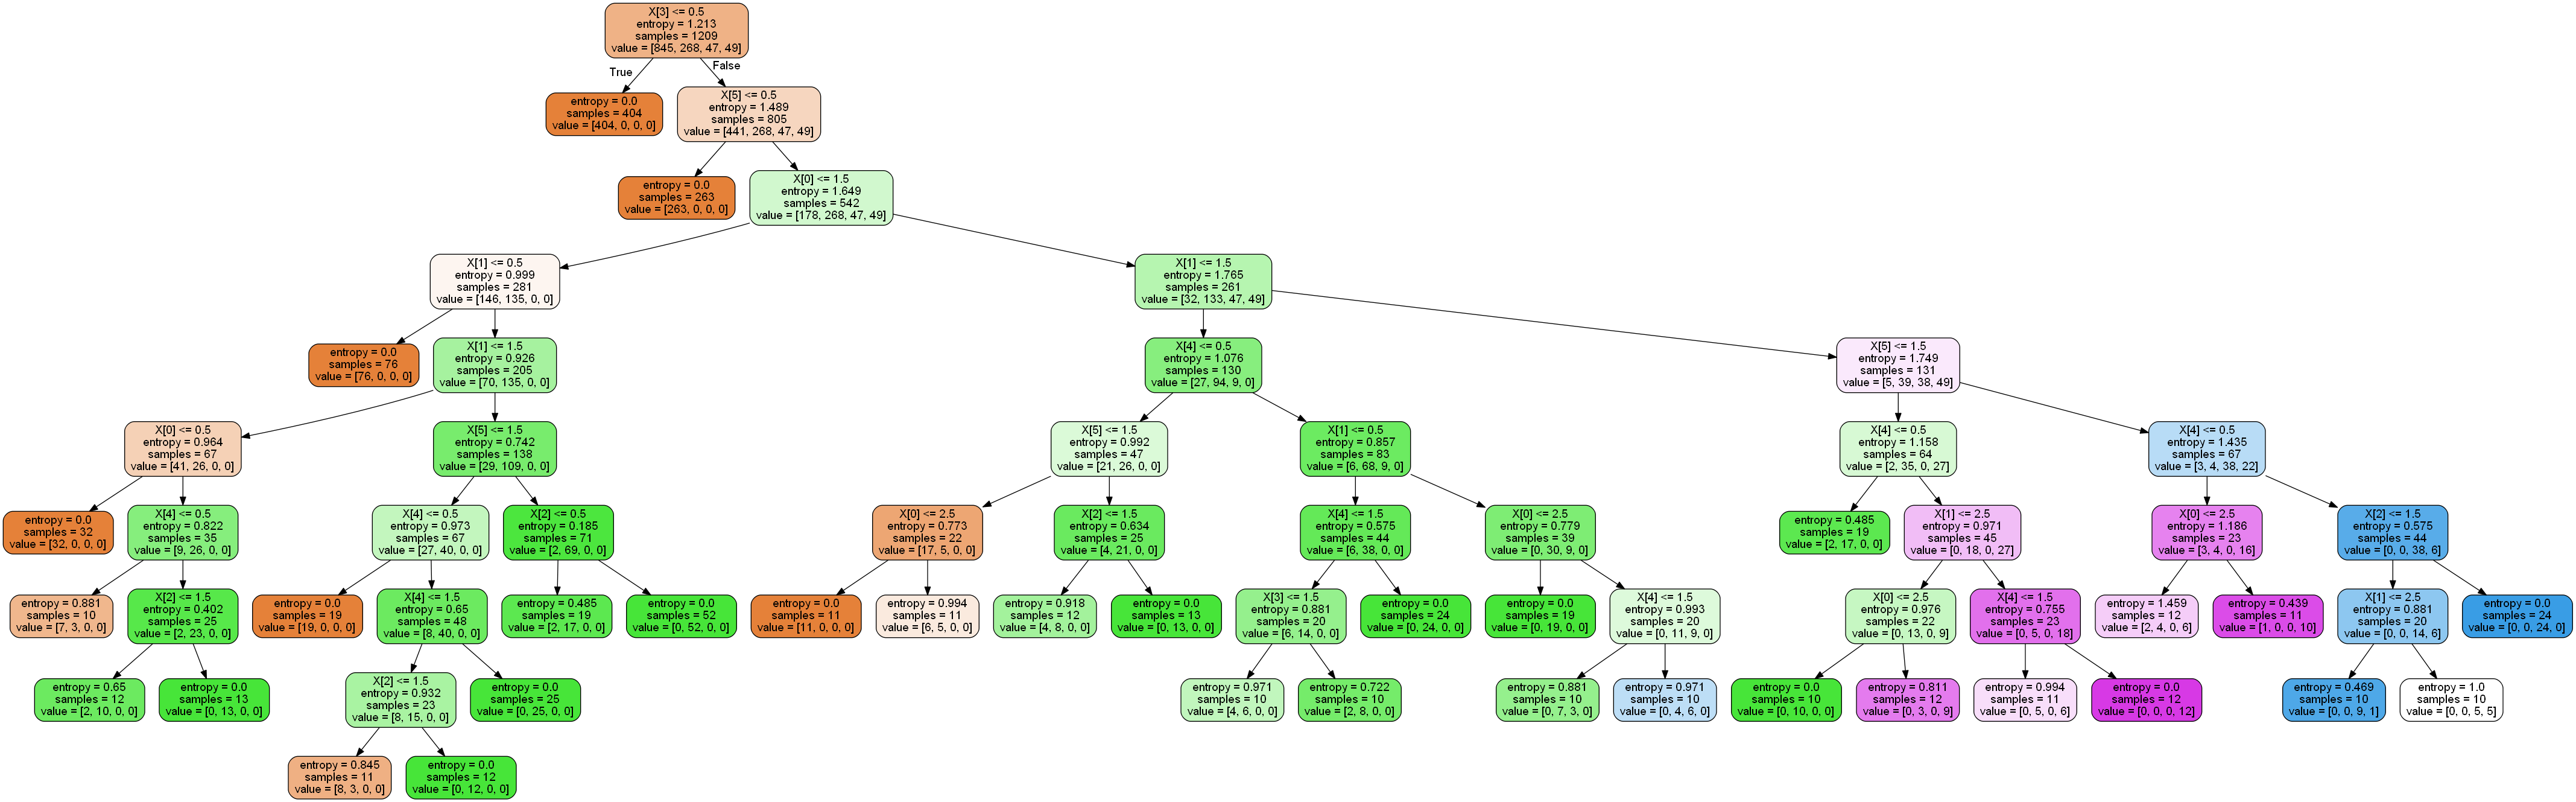

In [36]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

dot_data = tree.export_graphviz(best_dtmodel, 
                                out_file=None, 
                                filled=True, 
                                rounded=True,
                                )
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [37]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [40]:
temp = pd.DataFrame()
temp['variable'] = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
temp['VarImp'] = np.round(best_dtmodel.feature_importances_,2)
temp.sort_index(by='VarImp',ascending=False)

C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


,variable,VarImp
5,safety,0.31
3,persons,0.21
1,maint,0.18
0,buying,0.17
4,lug_boot,0.12
2,doors,0.02


## Safety is Prime Feature for Car Acceptability